In [4]:
!pip install dataprep

ERROR: Could not find a version that satisfies the requirement dataprep (from versions: none)
ERROR: No matching distribution found for dataprep


In [100]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_style('darkgrid')
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
#from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [102]:
df = pd.read_excel("C:/Users/tusha/Downloads/Random Forest/Random Forest/glass.xlsx",sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### About Dataset


+ RI : refractive index
+ Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
+ Mg: Magnesium
+ AI: Aluminum
+ Si: Silicon
+ K:Potassium
+ Ca: Calcium
+ Ba: Barium
+ Fe: Iron

+ <b>Type: Type of glass: </b>
+ 1 --building_windows_float_processed
+ 2 --building_windows_non_float_processed
+ 3 --vehicle_windows_float_processed
+ 4 --vehicle_windows_non_float_processed (none in this database)
+ 5 --containers
+ 6 --tableware
+ 7 --headlamps

#### <b>Traget : Type </b>
### Data Exploration
+ Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [105]:
df.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [107]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [109]:
df.shape

(214, 10)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [113]:
df[df.duplicated()].shape

(1, 10)

In [115]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [117]:
df.drop_duplicates(inplace=True)

In [119]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [121]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


The features are not on the same scale. For example Fe has a mean of 0.057277 and Si has a mean of 72.655070.

### Data Visualization
+ ###  Univariate plots

In [125]:
numerical_features = df.columns[:-1].tolist()
numerical_features

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

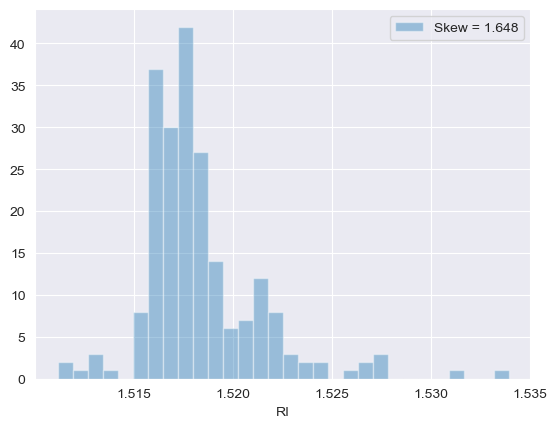

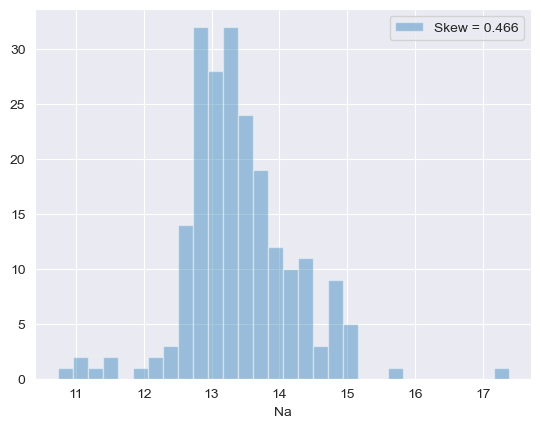

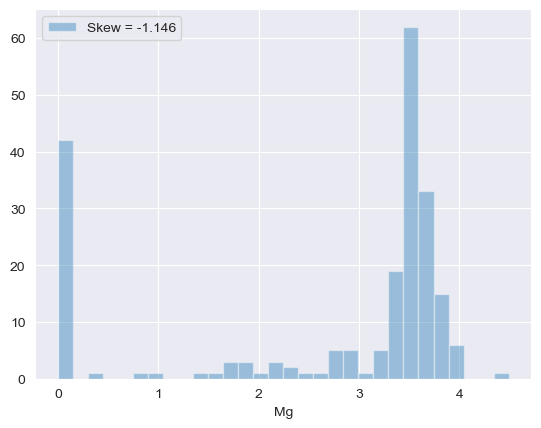

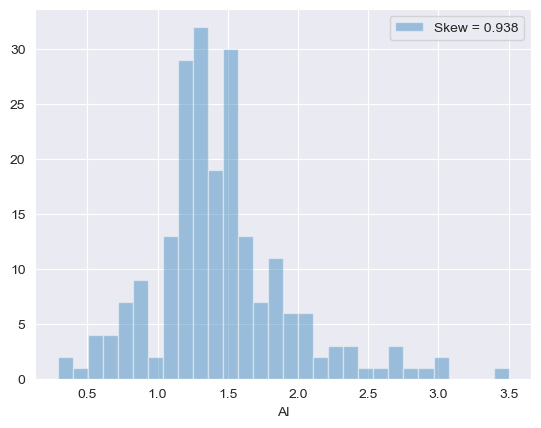

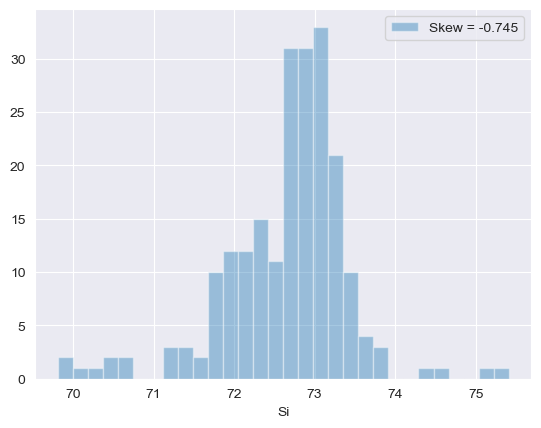

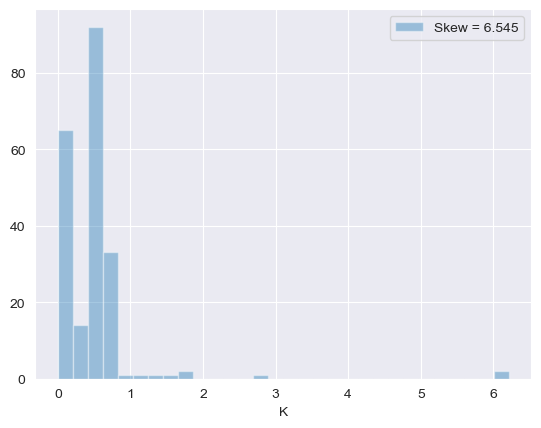

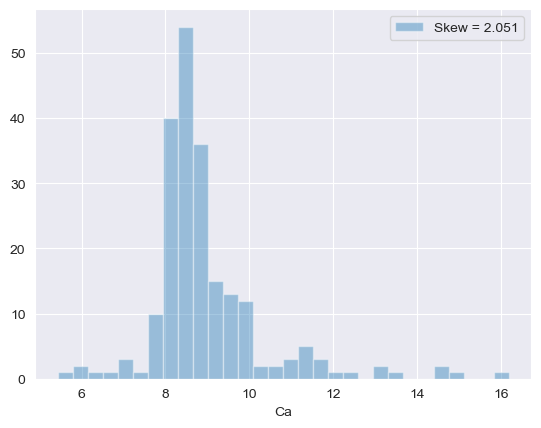

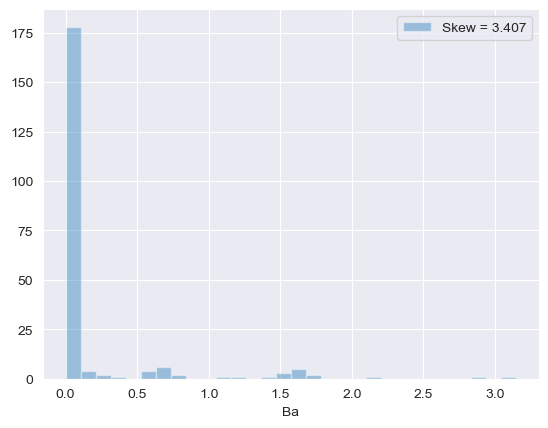

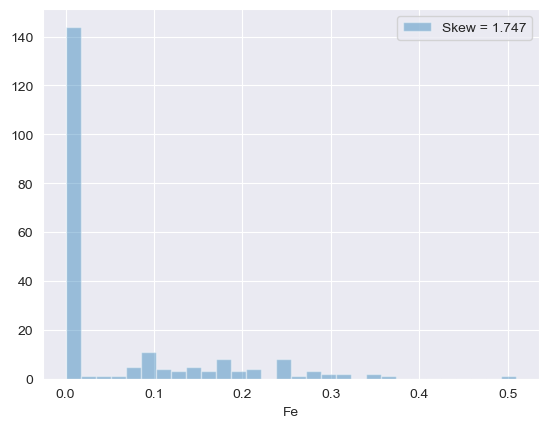

In [127]:
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat],kde=False,label='Skew = %.3f' %(skew),bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. 

In [129]:
from collections import Counter

# Detect observations with more than one outlier
def outlier_hunt(df):
    
    outlier_indices = []
    
    for col in df.columns[:-1].tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        
        # 3rd quartile (75%)
        Q3  = np.percentile(df[col],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features])))) 

The dataset contains 14 observations with more than 2 outliers


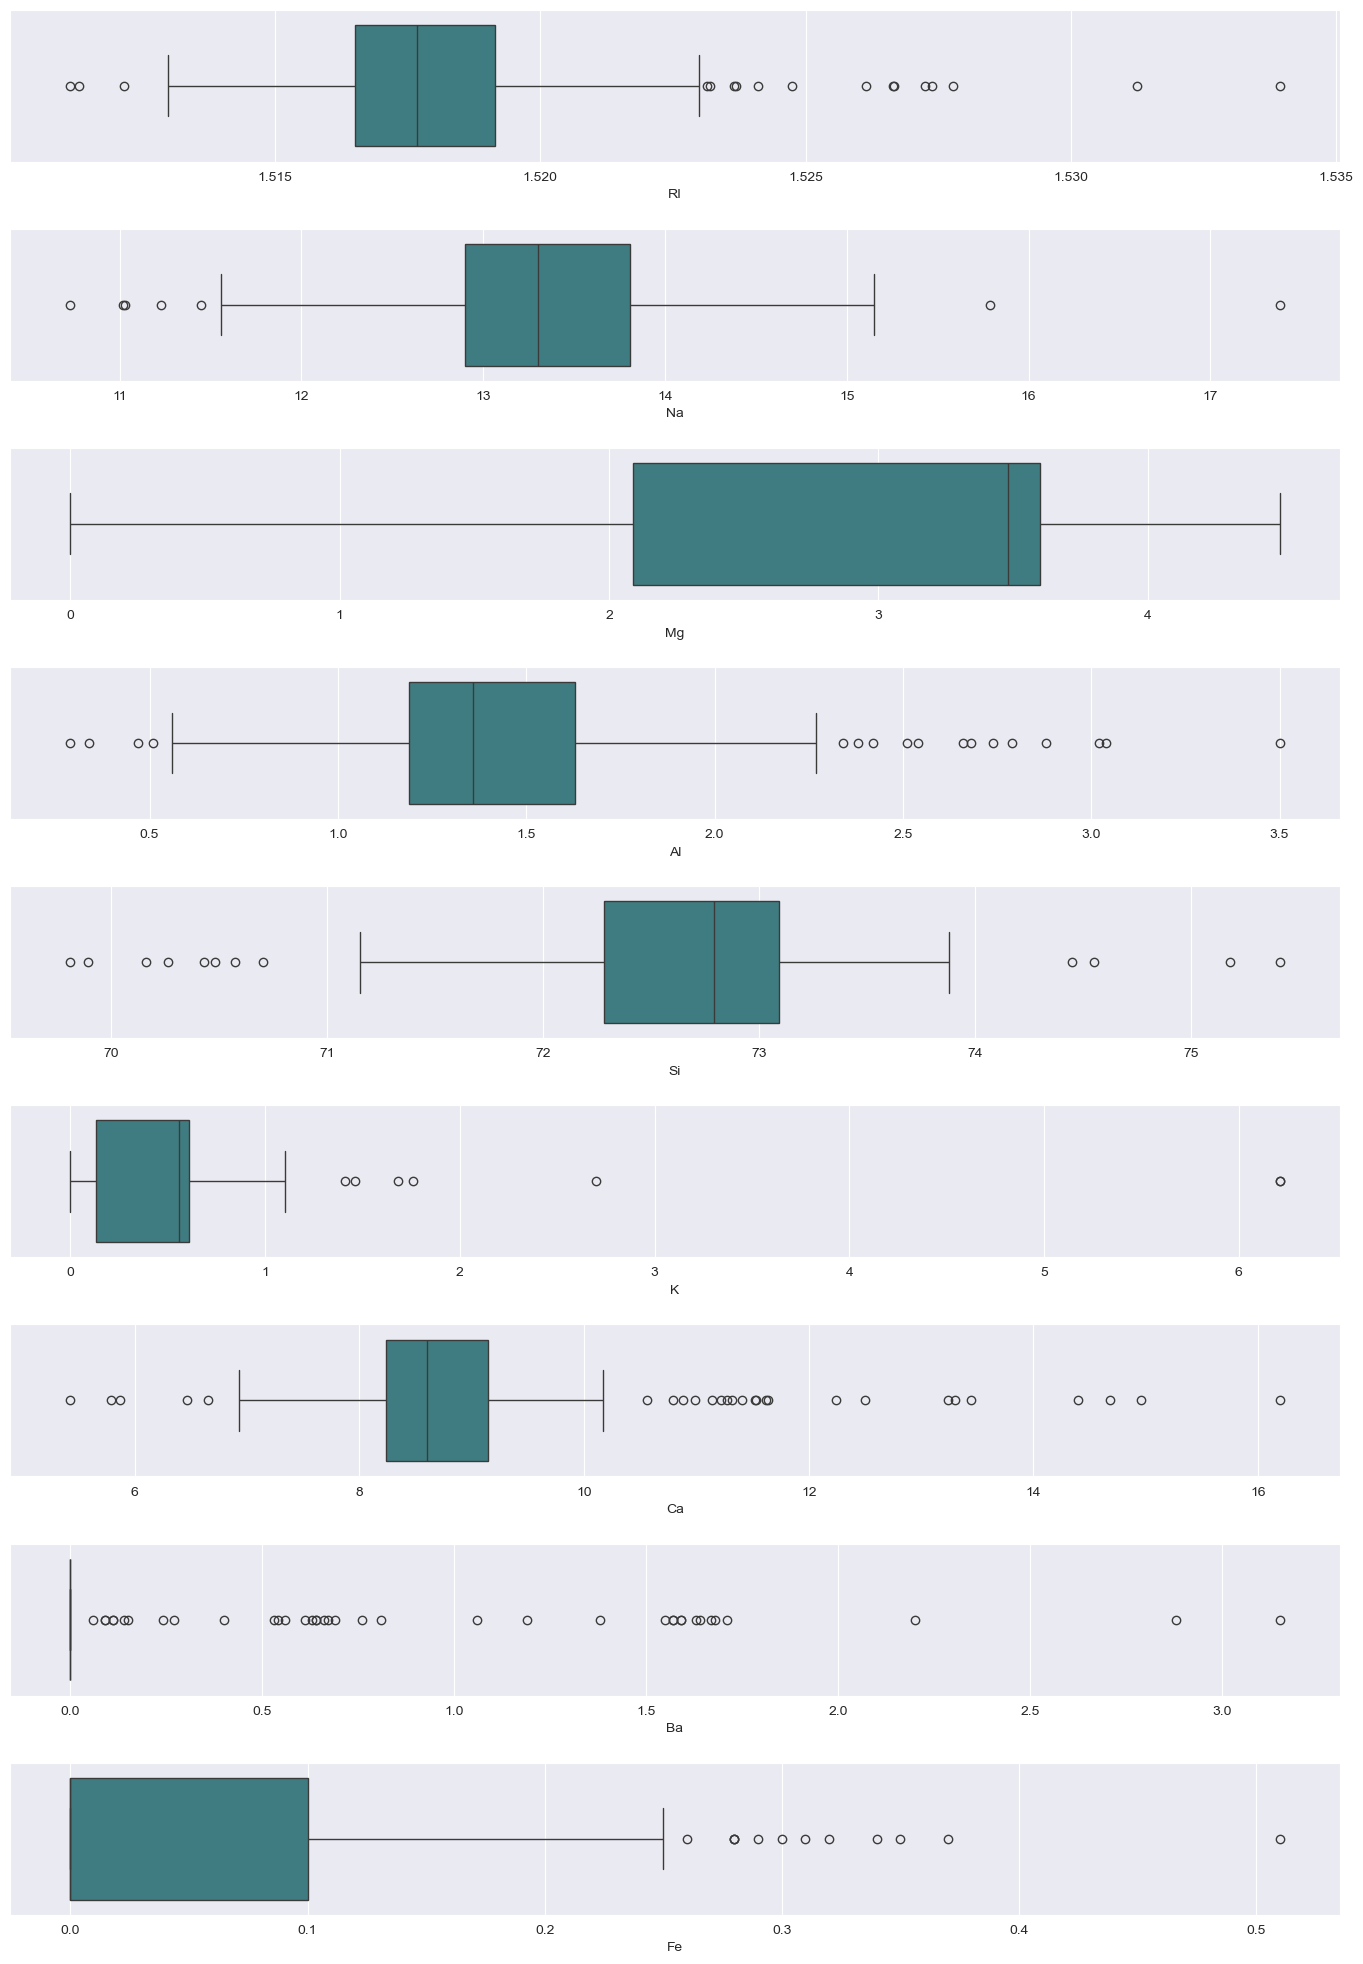

In [130]:
ot = df.copy()
fig, axes = plt.subplots(9,1, figsize=(14,20),sharex=False,sharey=False)
sns.boxplot(x=ot['RI'],data=ot,palette='crest',ax=axes[0])
sns.boxplot(x=ot['Na'],data=ot,palette='crest',ax=axes[1])
sns.boxplot(x=ot['Mg'],data=ot,palette='crest',ax=axes[2])
sns.boxplot(x=ot['Al'],data=ot,palette='crest',ax=axes[3])
sns.boxplot(x=ot['Si'],data=ot,palette='crest',ax=axes[4])
sns.boxplot(x=ot['K'],data=ot,palette='crest',ax=axes[5])
sns.boxplot(x=ot['Ca'],data=ot,palette='crest',ax=axes[6])
sns.boxplot(x=ot['Ba'],data=ot,palette='crest',ax=axes[7])
sns.boxplot(x=ot['Fe'],data=ot,palette='crest',ax=axes[8])
plt.tight_layout(pad=2.0)

<Axes: >

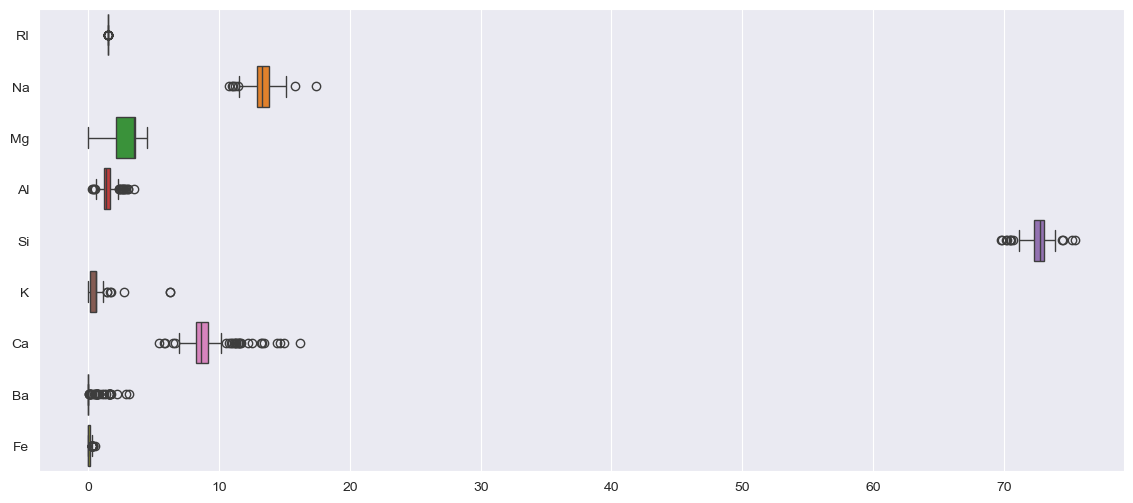

In [131]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

+ ### Multivariate Analysis
Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 800x800 with 0 Axes>

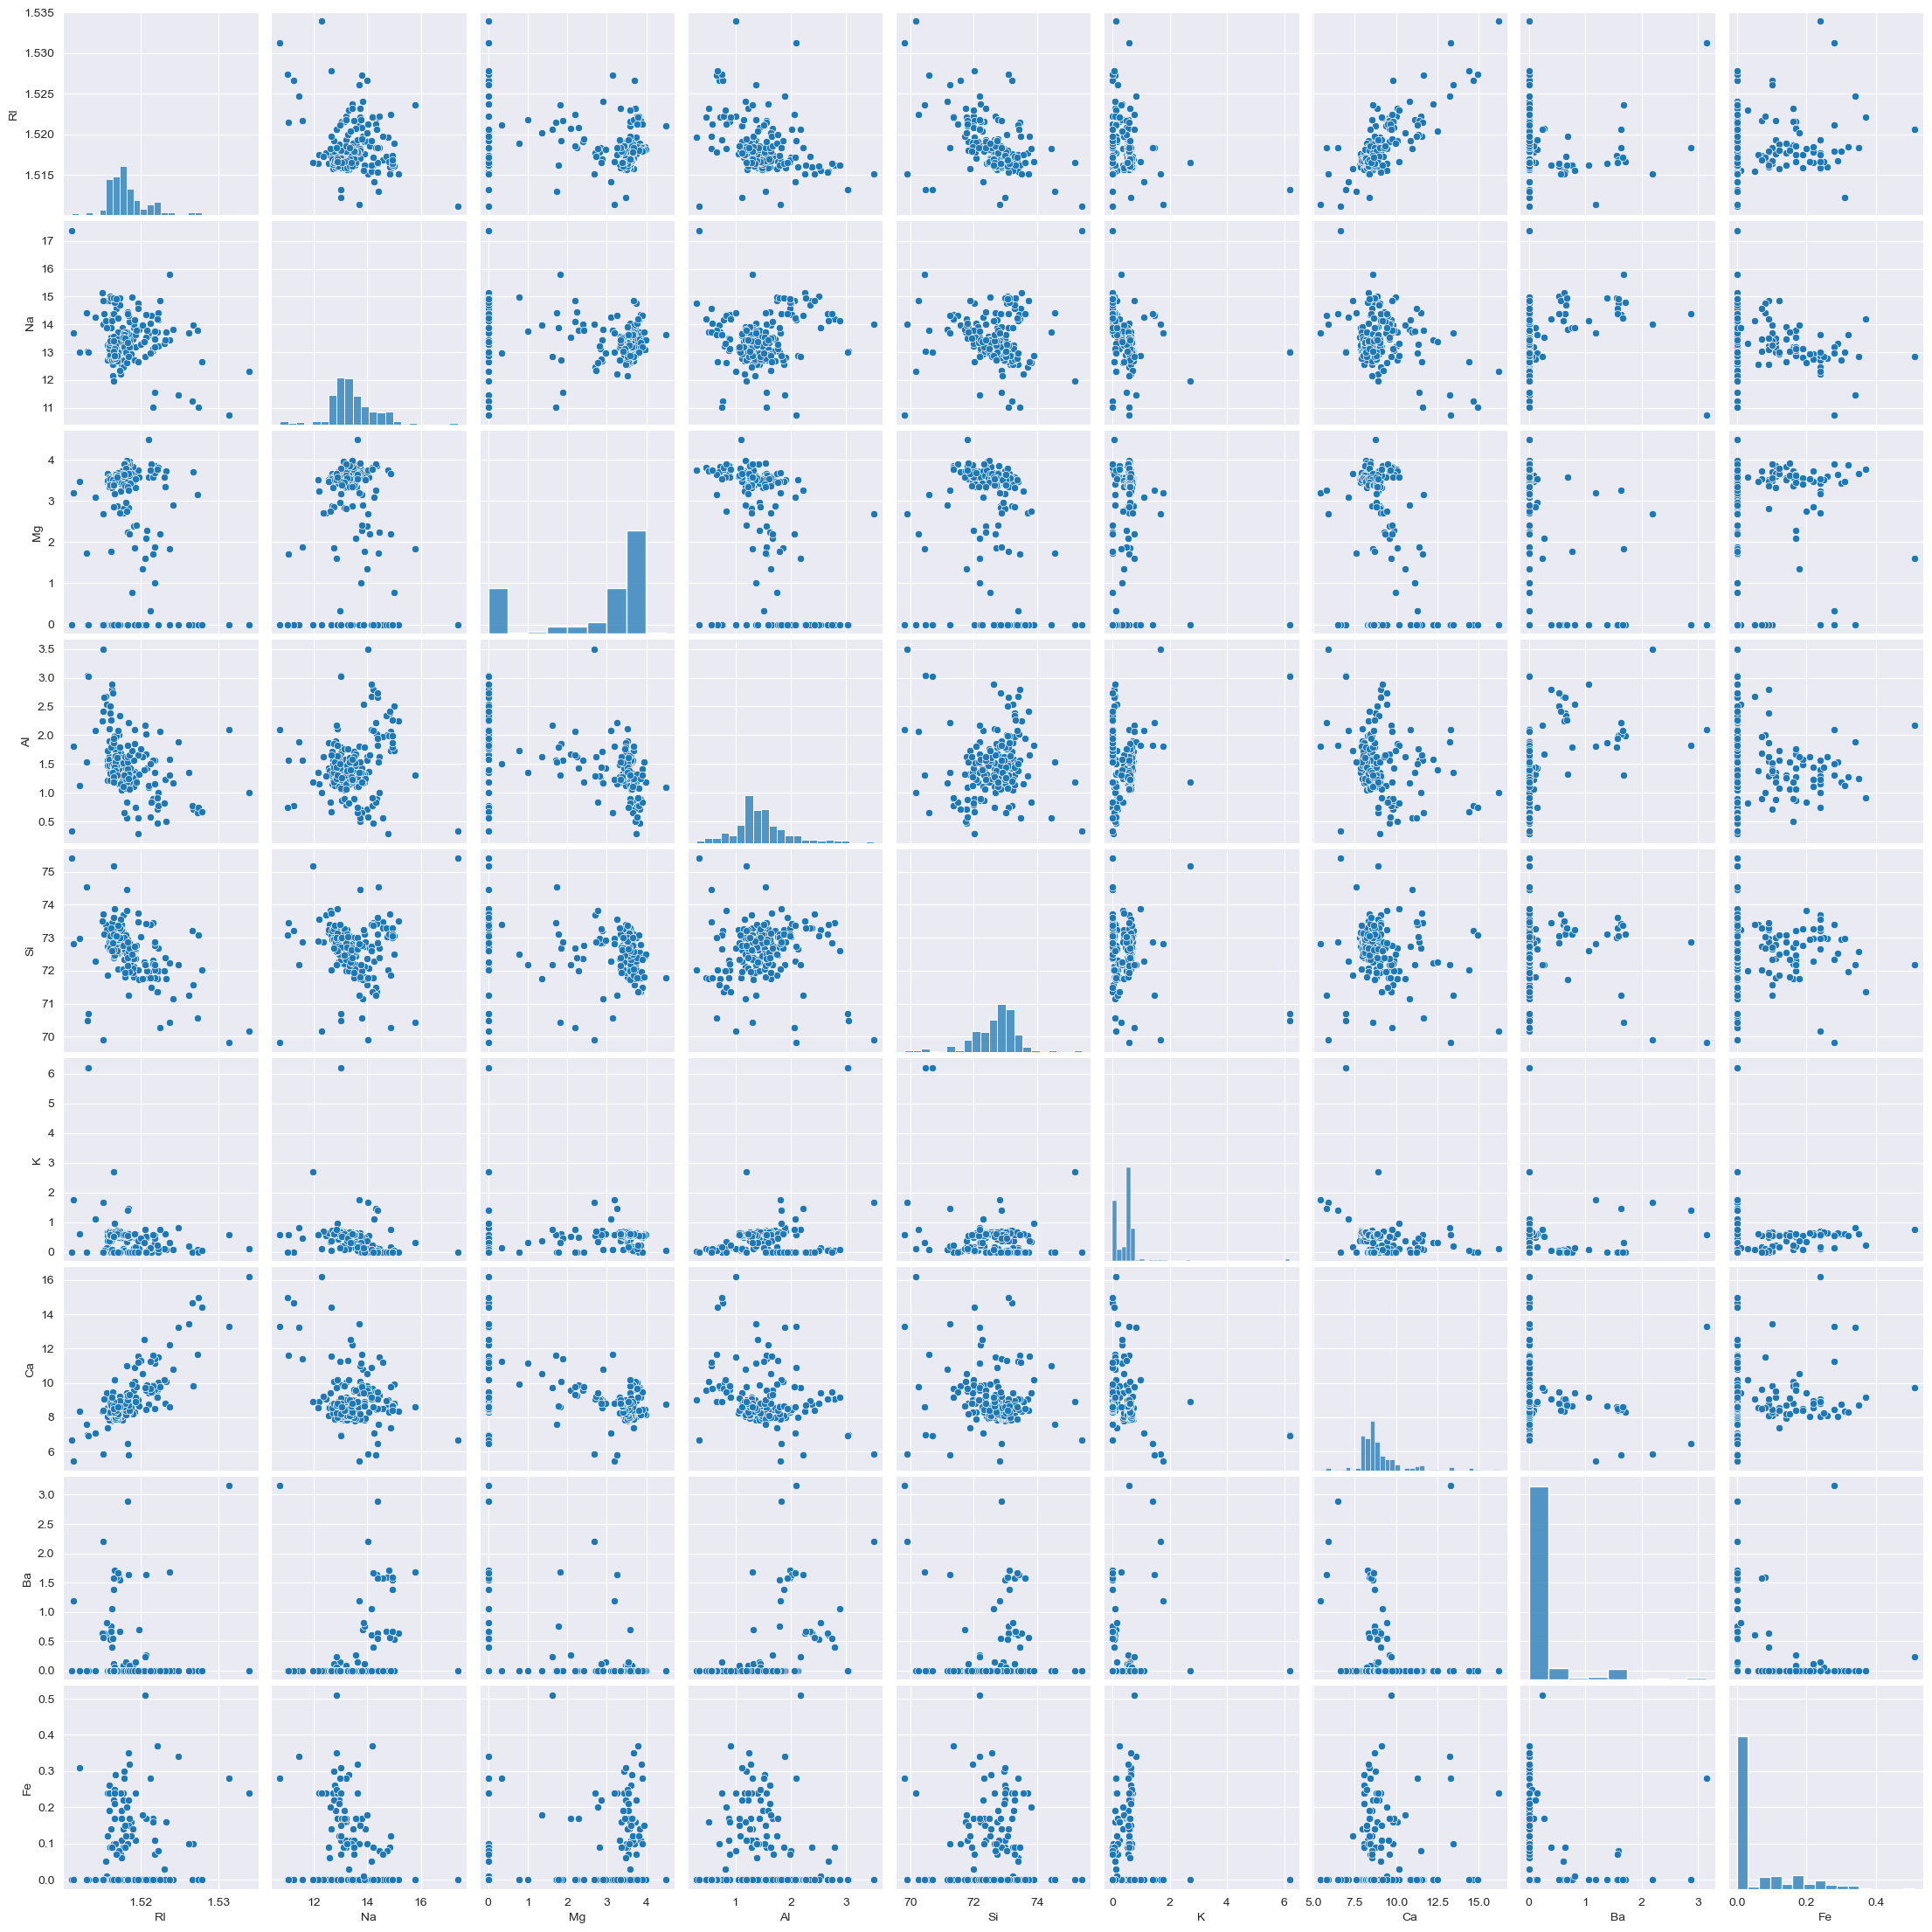

In [137]:
plt.figure(figsize=(8,8))
sns.pairplot(df[numerical_features],palette='coolwarm')
plt.show()

<Axes: >

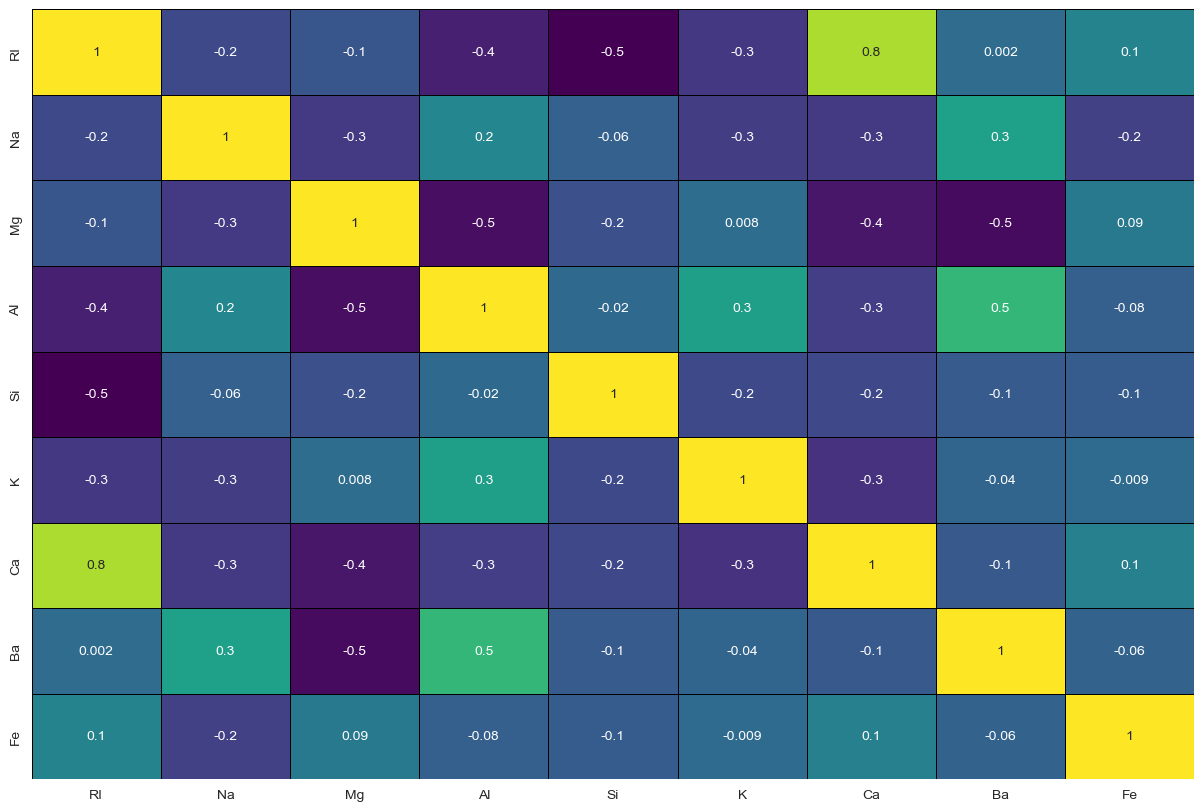

In [139]:
# Having a look at the correlation matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df[numerical_features].corr(),annot=True,fmt='.1g',cmap='viridis',cbar=False,linewidth=0.5,linecolor='black')

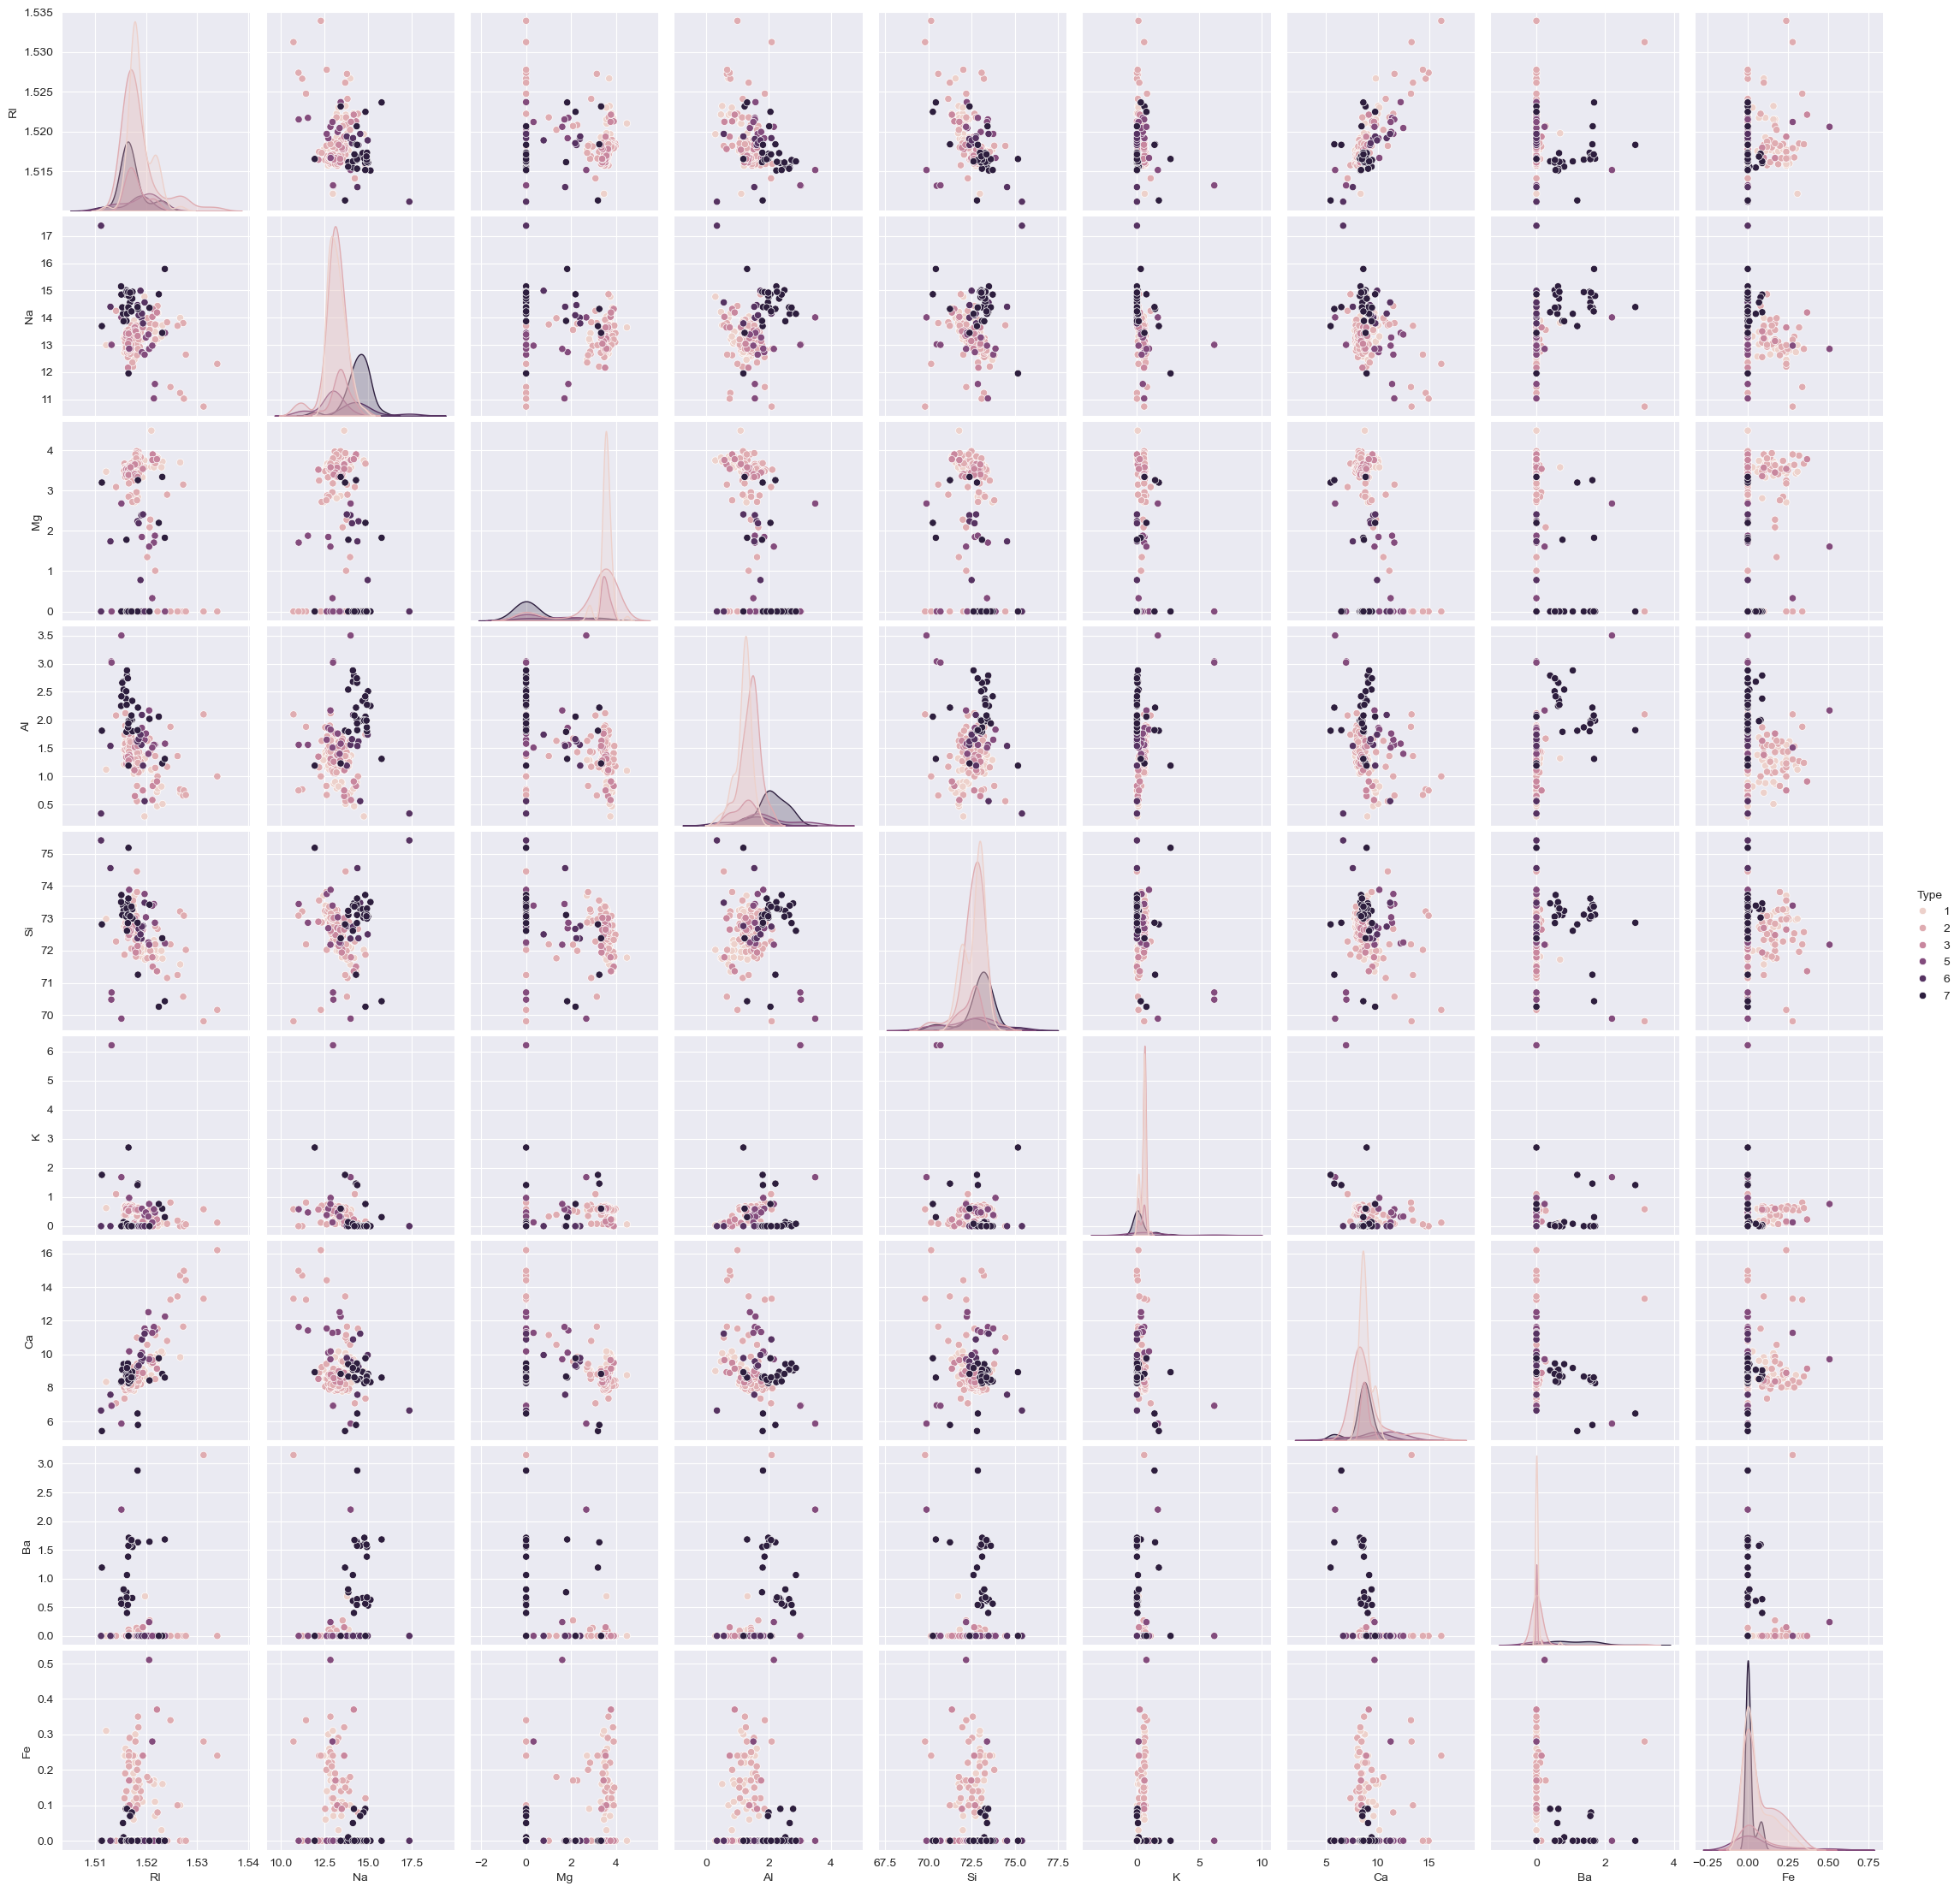

In [92]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df,hue='Type')

In [141]:
df1 = df.copy()
df1.drop('Type',axis=1,inplace=True)
df1.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0


Text(0.5, 1.0, 'Correlation with Type \n')

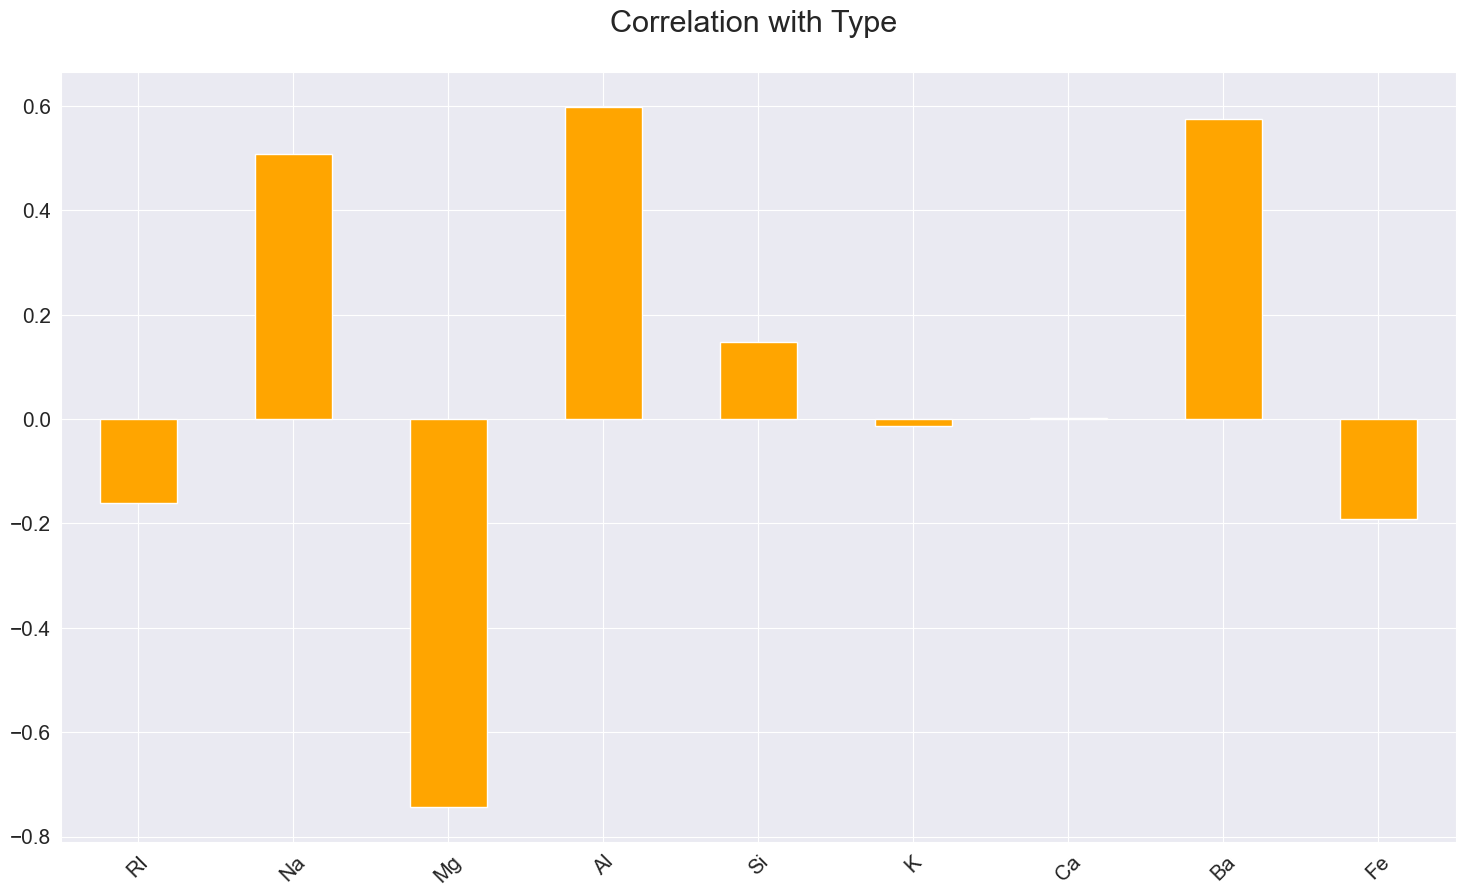

In [143]:
correlations = df1.corrwith(df['Type'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations>0].sort_values(ascending=False)
negative_correlations = correlations[correlations<0].sort_values(ascending=False)

correlations.plot.bar(figsize=(18,10),fontsize=15,color='orange',rot=45,grid=True)
plt.title('Correlation with Type \n',horizontalalignment='center',fontstyle='normal',fontsize=22,fontfamily='sans-serif')

#### Checking for Imbalanced or balanced dataset with regards to the Target

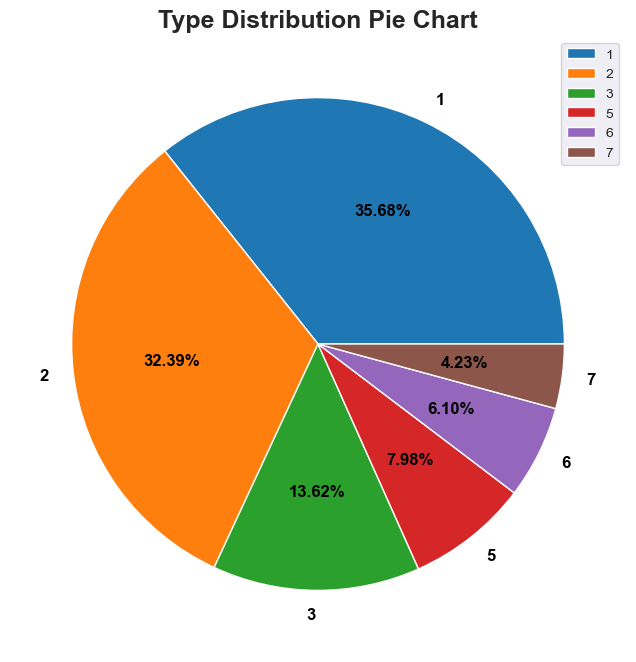

In [146]:
plt.figure(figsize=(12,8))
plt.pie(df['Type'].value_counts(),
       labels=df.Type.unique(),
        autopct= '%.2f%%',
        textprops = {'size':'large',
                   'fontweight':'bold',
                   'rotation':0,
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class 1 is called the majority class, and the much smaller in size 7 class is called the minority class.

In [149]:
df.Type.value_counts()

Type
2    76
1    69
7    29
3    17
5    13
6     9
Name: count, dtype: int64

Text(0.5, 1.0, 'Type')

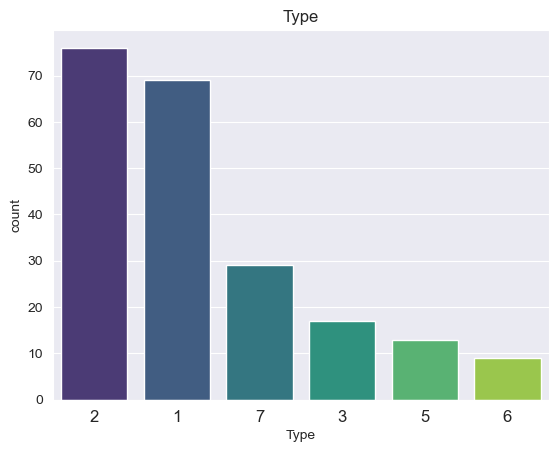

In [151]:
sns.countplot(x=df['Type'],data=df,palette='viridis',
             order=df['Type'].value_counts().index
             )
plt.xticks(fontsize=12)
plt.title('Type')

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

### Feature Selection Technique

In [154]:
# split into input (X) and output (y) variables

X = df.iloc[:,:-1]
y = df['Type']

In [156]:
#Feature importance

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [158]:
# feature extraction

test = SelectKBest(score_func=chi2,k=4)
fit = test.fit(X,y)

In [160]:
# summarize scores

scores = fit.scores_
features = fit.transform(X)

In [162]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,144.659991,Ba
2,100.728772,Mg
5,31.485097,K
3,16.602047,Al
1,4.335113,Na
6,3.237442,Ca
8,2.160581,Fe
4,0.109779,Si
0,0.000047,RI


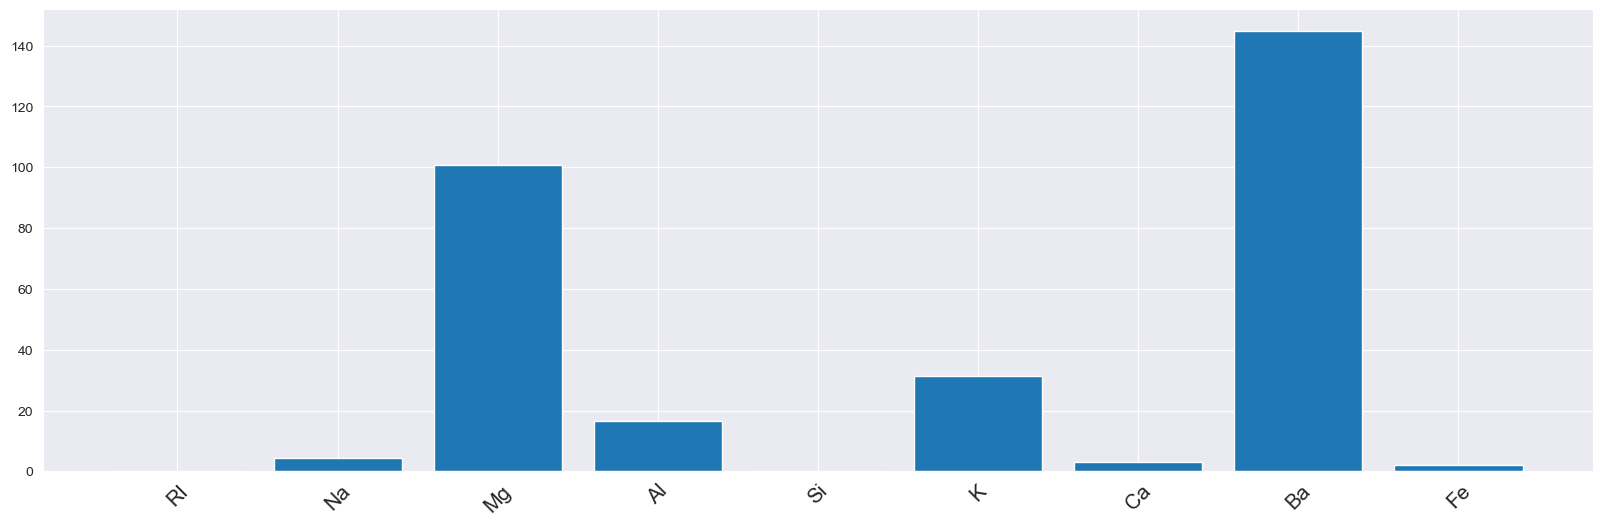

In [164]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 45, size = 15)
plt.show()

### Random Forest Built-in Feature Importance
The Random Forest algorithm has built-in feature importance which can be computed in two ways:

+ **Gini importance** (or mean decrease impurity), which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. <mark>**It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within.**</mark> The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).

+ **Mean Decrease Accuracy** - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=100, oob_score=True)

classifier_rf.fit(X, y)

# checking the oob score
print('checking the oob score',classifier_rf.oob_score_)

rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X, y)

print('Best Score',grid_search.best_score_)

rf_best = grid_search.best_estimator_
print(rf_best)

checking the oob score 0.7417840375586855
Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.7044025157232705
RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)


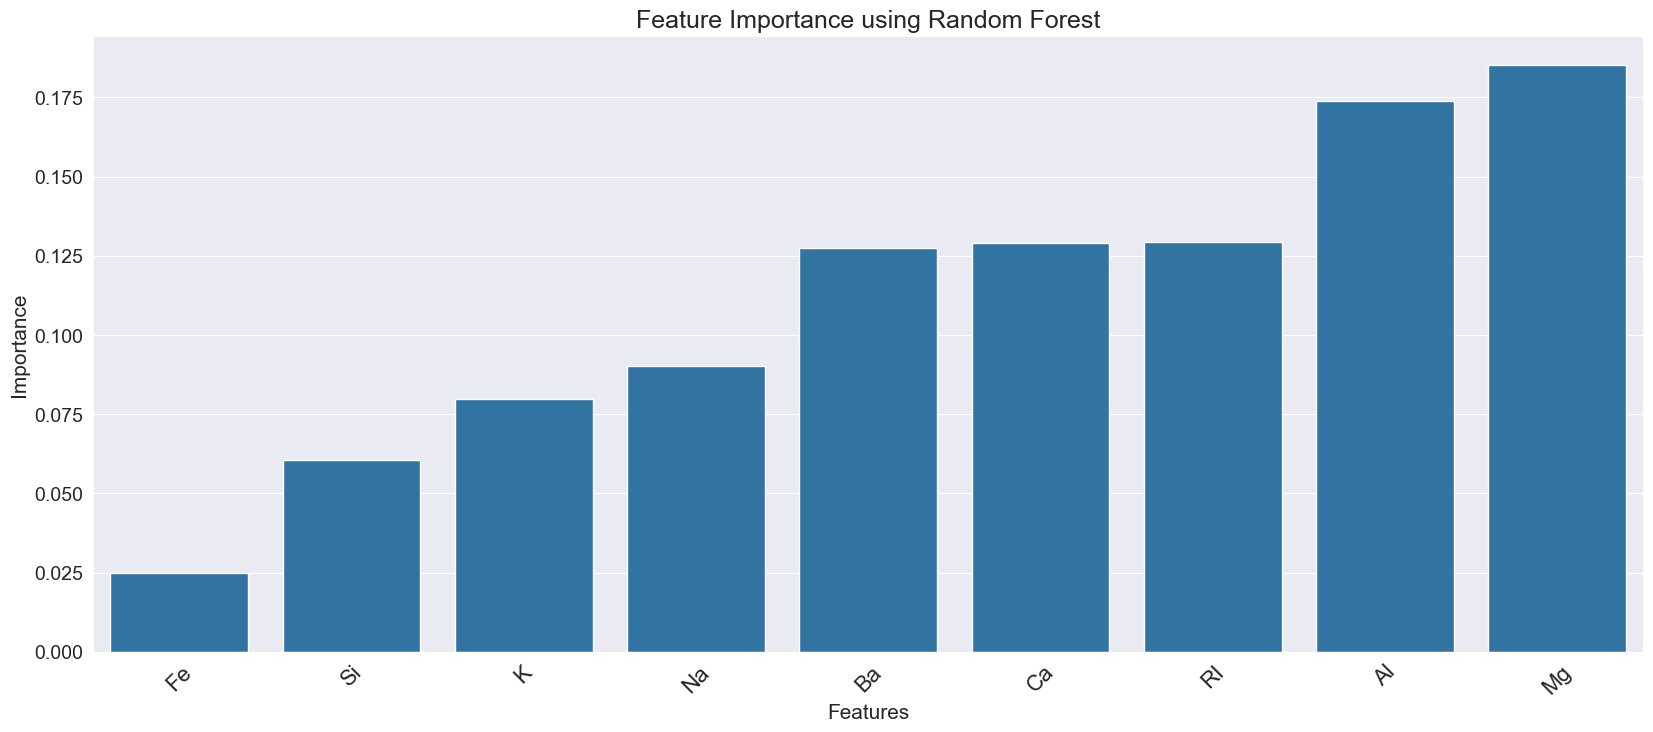

In [174]:
rf_best.feature_importances_
imp_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_best.feature_importances_
})

plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Importance", 
            data=imp_df, 
            order=imp_df.sort_values('Importance').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Importance", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 45, fontsize = 16)
plt.title("Feature Importance using Random Forest", size=18)
plt.show()

### Test Train Split With Imbalanced Dataset

In [175]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [176]:
x = df.drop('Type',axis=1)
y = df['Type']

In [177]:
y.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [178]:
# Create StratifiedKFold object.

from sklearn.model_selection import StratifiedKFold
from collections import Counter

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 68, 1: 63, 7: 26, 3: 15, 5: 12, 6: 8}) Testing Data Counter({2: 8, 1: 6, 7: 3, 3: 2, 5: 1, 6: 1})


In [179]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [187]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 53, 1: 48, 7: 20, 3: 12, 5: 9, 6: 7}) Testing Data Counter({2: 23, 1: 21, 7: 9, 3: 5, 5: 4, 6: 2})


In [189]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (64, 9)
Shape of y_train:  (149,)
Shape of y_test (64,)


### Grid search using Stratified Kfold Splits on Imbalanced Dataset

In [192]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(train_X, train_y)

print_score(rf_clf, train_X, train_y, test_X, test_y, train=True)
print_score(rf_clf, train_X, train_y, test_X, test_y, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1     2     3     5    6     7  accuracy  macro avg  \
precision   1.0   1.0   1.0   1.0  1.0   1.0       1.0        1.0   
recall      1.0   1.0   1.0   1.0  1.0   1.0       1.0        1.0   
f1-score    1.0   1.0   1.0   1.0  1.0   1.0       1.0        1.0   
support    63.0  68.0  15.0  12.0  8.0  26.0       1.0      192.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support           192.0  
_______________________________________________
Confusion Matrix: 
 [[63  0  0  0  0  0]
 [ 0 68  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 26]]

Test Result:
Accuracy Score: 71.43%
_______________________________________________
CLASSIFICATION REPORT:
                  1     2    3         5    6    7  accuracy  macro avg  \
precision  0.600000  0.75  0.5  0.500

### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset

In [196]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              1     2     3    5    6     7  accuracy  macro avg  weighted avg
precision   1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0   1.0  1.0  1.0   1.0       1.0        1.0           1.0
support    48.0  53.0  12.0  9.0  7.0  20.0       1.0      149.0         149.0
_______________________________________________
Confusion Matrix: 
 [[48  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  9  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 20]]

Test Result:
Accuracy Score: 85.94%
_______________________________________________
CLASSIFICATION REPORT:
                   1          2         3         5    6         7  accuracy  \
precision   0.909091   0.814815  1.000000  0.666667  1.0  0.888889  0.859375   
recall      0.952381   0.956522  

### Handling imbalance data using SMOTE based techniques

In [198]:
x = df.drop(['Type'], axis=1)
y = df['Type']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [200]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (149, 9)
Shape of X_test:  (64, 9)
Shape of y_train:  (149,)
Shape of y_test (64,)


### SMOTE Oversampling technique

In [203]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 53, 1: 48, 7: 20, 3: 12, 5: 9, 6: 7})
After Counter({7: 53, 1: 53, 2: 53, 6: 53, 5: 53, 3: 53})


### Hybridization: SMOTE + Tomek Links

In [206]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 53, 1: 48, 7: 20, 3: 12, 5: 9, 6: 7})
After Counter({7: 53, 6: 53, 5: 53, 1: 51, 2: 51, 3: 51})


### Hybridization: SMOTE + ENN

In [209]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 53, 1: 48, 7: 20, 3: 12, 5: 9, 6: 7})
After Counter({5: 53, 6: 52, 7: 46, 3: 41, 1: 27, 2: 19})


### Performance Analysis after Resampling

In [212]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [214]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')
          
    
    return algo,precision,recall,f1,sampling

In [224]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt' ]

         }
    }
}

In [226]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with ACTUAL
Confusion Matrix
[[19  2  0  0  0  0]
 [ 1 20  0  2  0  0]
 [ 2  2  1  0  0  0]
 [ 0  1  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  8]] 

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        21
           2       0.77      0.87      0.82        23
           3       1.00      0.20      0.33         5
           5       0.50      0.50      0.50         4
           6       1.00      1.00      1.00         2
           7       0.89      0.89      0.89         9

    accuracy                           0.81        64
   macro avg       0.84      0.73      0.74        64
weighted avg       0.83      0.81      0.80        64
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
random-forest with SMOTE
Confusion Matrix
[[15  1  4  0  1  0]
 [ 1 16  2  2  0  2]
 [ 3  0  2  0  0  0]
 [ 0  0  0  3  0  1]
 [ 0  0  0  0

### Random Forest hyperparameter tuning

In [238]:
#base model
score_array = []
for each in range(1,200):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))

In [240]:
loc = np.array(score_array).max()
score_array.index(loc)+1

120

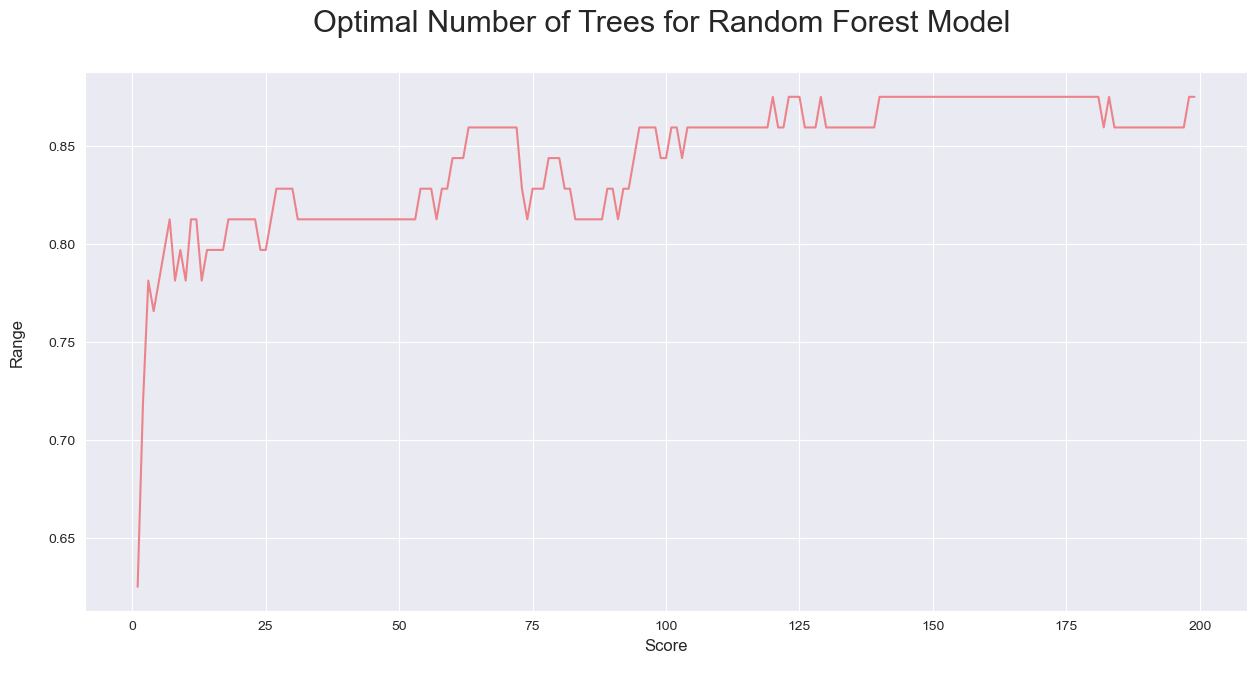

In [242]:
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,200),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

### Randomized Search Cross Validation

In [247]:
n_estimators = [int(x) for x in np.linspace(start=0, stop=200, num=200)]
max_features = [ 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 195, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True})
Train Result:
Accuracy Score: 93.29%
_______________________________________________
CLASSIFICATION REPORT:
                   1          2          3    5    6          7  accuracy  \
precision   0.900000   0.913793   1.000000  1.0  1.0   1.000000  0.932886   
recall      0.937500   1.000000   0.583333  1.0  1.0   0.900000  0.932886   
f1-score    0.918367   0.954955   0.736842  1.0  1.0   0.947368  0.932886   
support    48.000000  53.000000  12.000000  9.0  7.0  20.000000  0.932886   

            macro avg  weighted avg  
precision    0.968966      0.937121  
recall       0.903472      0.932886  
f1-score     0.926255      0.929421  
support    149.000000    149.000000  
_______________________________________________
Confusion Matrix: 
 [[45  3  0  0  0  0]
 [ 0 53  0  0  0  

### Grid Search Cross Validation

In [249]:
# Create a pipeline with a Random forest classifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from time import time
    
pipe_rfc = Pipeline([ 
                      ('scl', StandardScaler()), 
                    ('rfc', RandomForestClassifier(random_state=0, n_jobs=-1) )])

# Set the grid parameters
param_grid_rfc =  [ {
    'rfc__n_estimators': [100, 200,300,400], # number of estimators
    #'rfc__criterion': ['gini', 'entropy'],   # Splitting criterion
    'rfc__max_features':[0.05 , 0.1], # maximum features used at each split
    'rfc__max_depth': [None, 5], # Max depth of the trees
    'rfc__min_samples_split': [0.005, 0.01], # mininal samples in leafs
    }]
# Use 10 fold CV
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state= 0)
grid_rfc = GridSearchCV(pipe_rfc, param_grid= param_grid_rfc, cv=kfold, scoring='f1', verbose= 1, n_jobs=-1)

#Fit the pipeline
start = time()
grid_rfc = grid_rfc.fit(x_train, y_train)
end = time()

print("RFC grid search took %.3f seconds" %(end-start))

# Best score and best parameters
print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
RFC grid search took 118.122 seconds
-------Best score----------
nan
-------Best params----------
{'rfc__max_depth': None, 'rfc__max_features': 0.05, 'rfc__min_samples_split': 0.005, 'rfc__n_estimators': 100}


### Visualizing one of the decision tree in random forest

In [251]:
rf_best = rf_cv.best_estimator_
rf_best

RandomForestClassifier(max_depth=90, min_samples_leaf=4, n_estimators=195,
                       random_state=42)

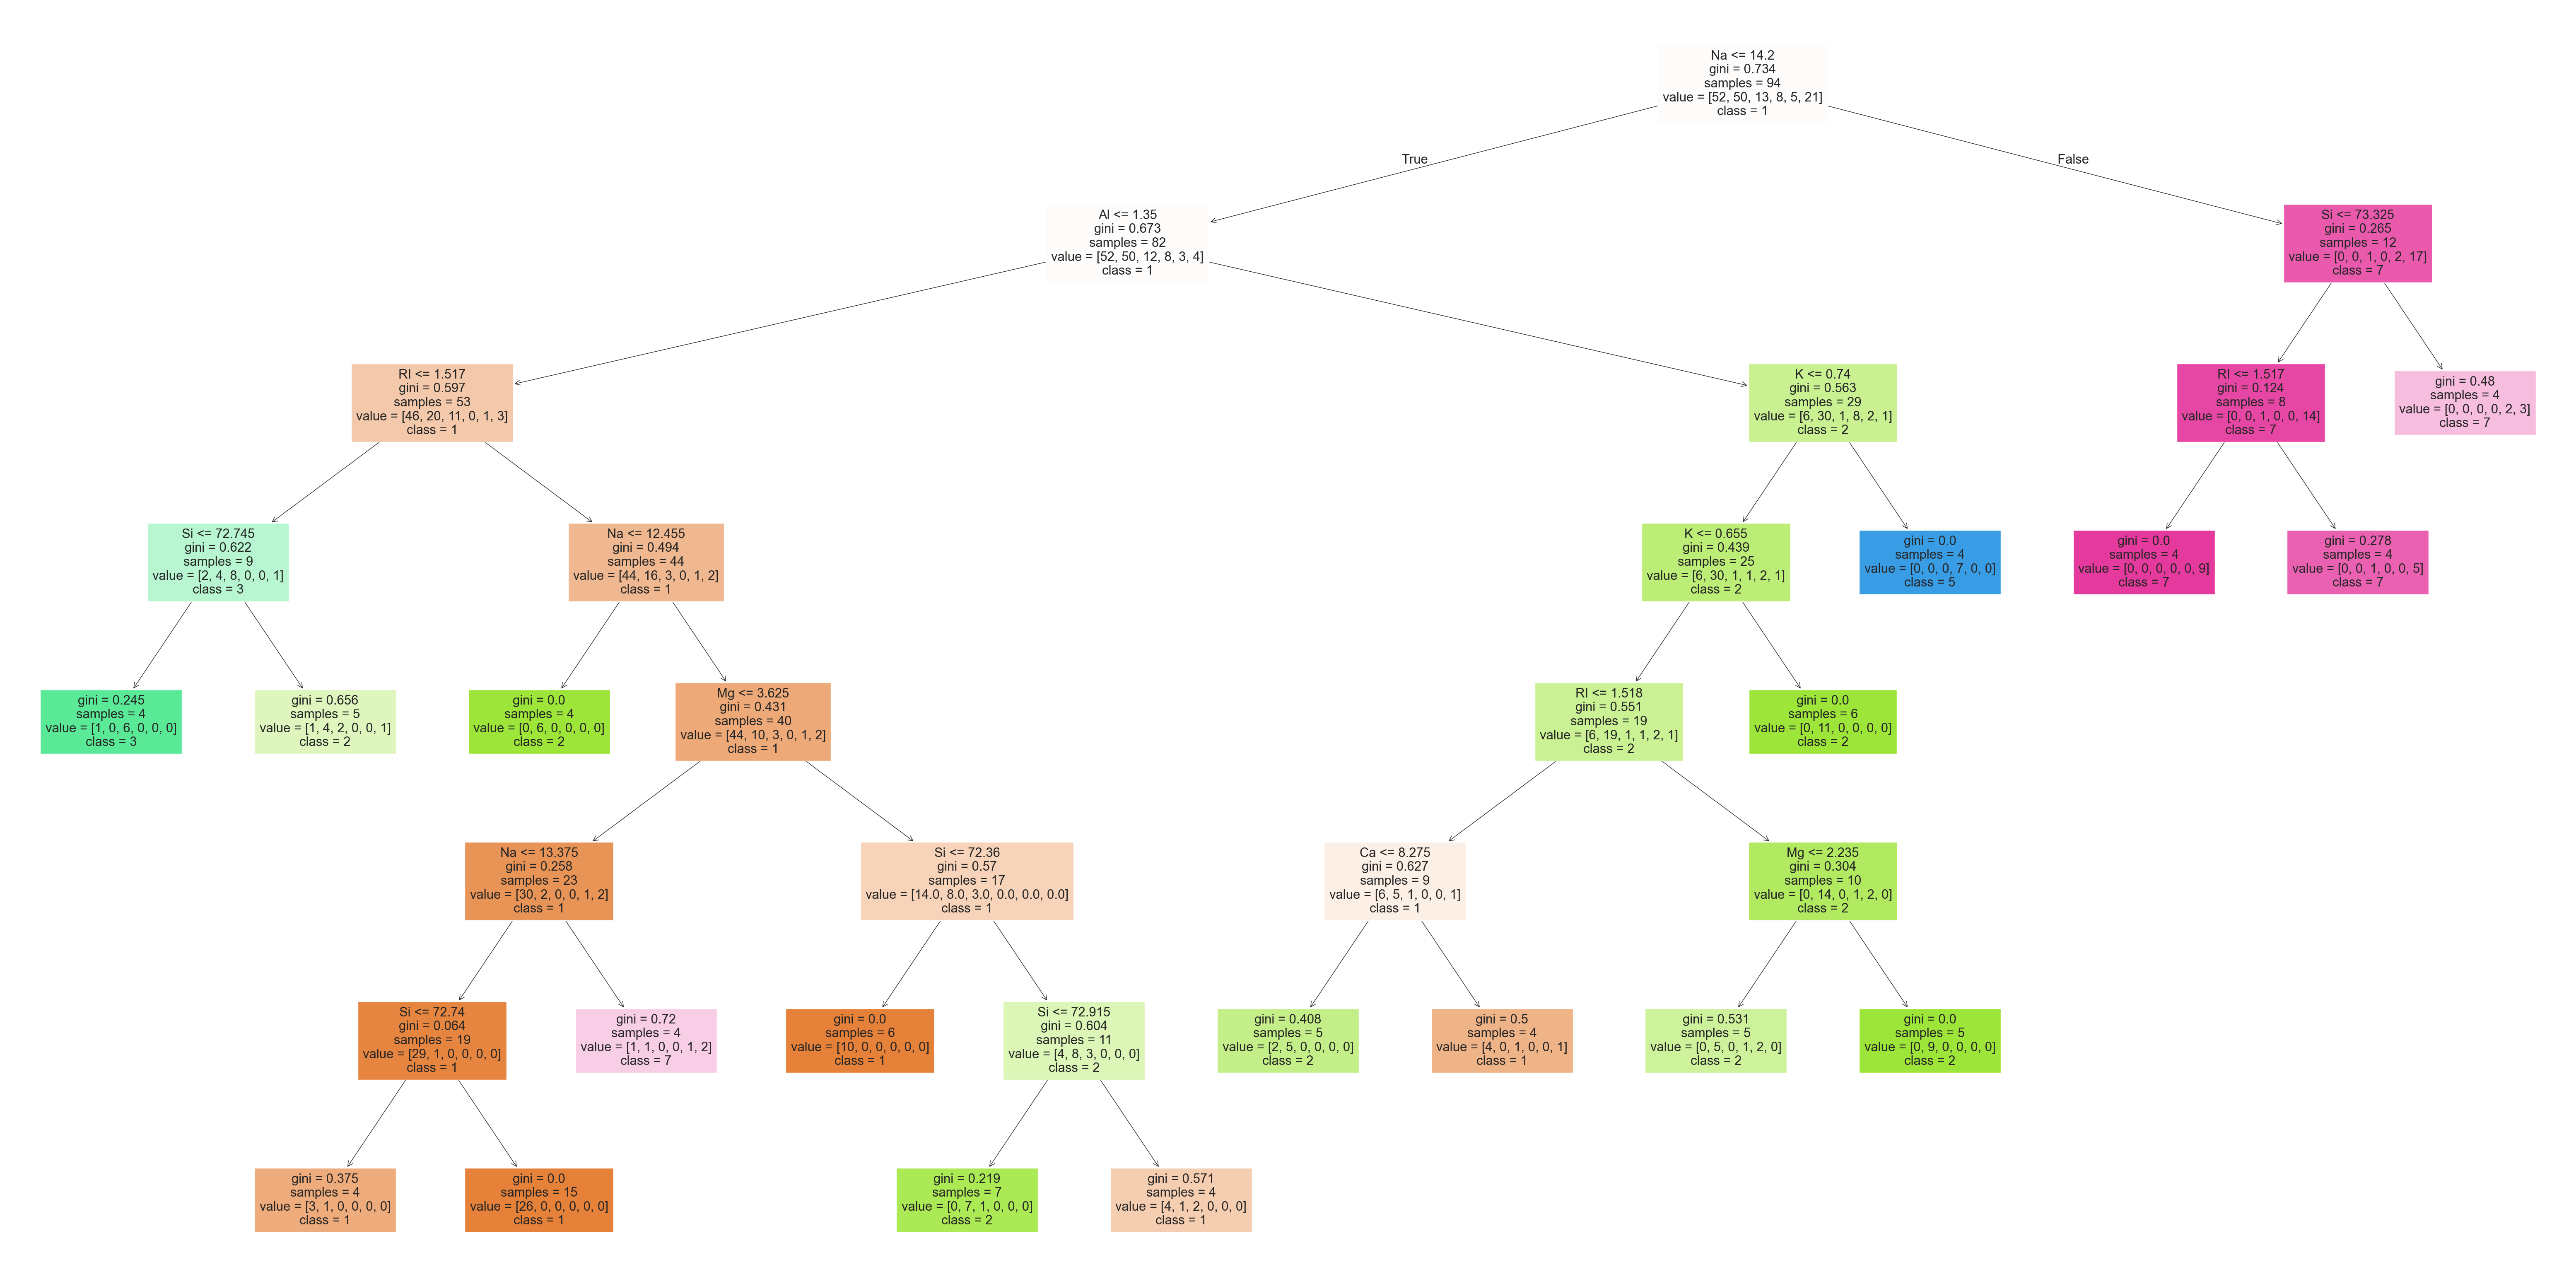

In [253]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert class names to strings
class_names = [str(name) for name in df.Type.unique()]

# Plot the tree
plt.figure(figsize=(80, 40))
plot_tree(rf_best.estimators_[59], feature_names=df.columns, class_names=class_names, filled=True)
plt.show()


## Interview Questions

### 1. Explain Bagging and Boosting methods. How is it different from each other.


Bagging (Bootstrap Aggregating) and Boosting are ensemble learning techniques used to improve the performance of machine learning models. Both methods combine multiple weak learners to create a stronger overall model but in different ways
1. Bagging (Bootstrap Aggregating)

Concept:
Goal: Reduce variance and prevent overfitting.

Method:

Multiple subsets of the dataset are created using random sampling with replacement (bootstrapping).

A model (e.g., Decision Tree, KNN) is trained on each subset independently.

The final prediction is made using majority voting (classification) or averaging (regression).

2. Boosting

Concept:
Goal: Reduce bias and improve predictive accuracy.

Method:

Models are trained sequentially, where each new model focuses on errors made by previous models.

Misclassified instances are given higher weights so that the next model can correct them.

The final prediction is based on a weighted combination of all models.

### 2. Explain how to handle imbalance in the data.

Handling imbalanced data is crucial to ensure that machine learning models do not favor the majority class while ignoring the minority class. Here are the key techniques to handle imbalance.

#### 1. Data-Level Techniques (Resampling Methods)
a. Oversampling (Increase Minority Class)
Synthetic Minority Over-sampling Technique (SMOTE): Generates synthetic samples of the minority class.

Random Oversampling: Duplicates existing minority class samples.

b. Undersampling (Reduce Majority Class)
Random Undersampling: Removes random samples from the majority class.

Cluster-Based Undersampling: Groups similar majority class samples and removes some

c. Hybrid Sampling (Combination of Over & Under Sampling)
Balances data without excessive duplication or data loss.

#### 2. Algorithm-Level Techniques
a. Class Weight Adjustment
Assign higher misclassification penalties to the minority class using.

b. Cost-Sensitive Learning
Modifies loss function to penalize misclassification of the minority class more.

#### 3. Performance Evaluation Metrics (Instead of Accuracy)
Use metrics that work well with imbalanced data:

Precision-Recall (PR) Curve

F1-Score

ROC-AUC (for ranking models correctly)

Balanced Accuracy = (Sensitivity + Specificity) / 2